In [1]:
%load_ext autoreload
%autoreload 2

from shared.reaction_class import returnReactionTemplates, VirtualFlask

mechs = returnReactionTemplates()

In [236]:
state_network = VirtualFlask(mechs)

intro_input = "NC1=CC=CC=C1.O=C(C(C2=CC=CC=C2)=O)O.O=P(OC)OC".split(".")

state_network.charge(intro_input, [])
state_network.run_until_done(iters=7, thresh=10000, ring_filter=False, precalc_prods=["O=C(C(NC1=CC=CC=C1)(P(OC)(OC)=O)C2=CC=CC=C2)O"])
hit_node = state_network.find_node_with_smiles("O=C(C(NC1=CC=CC=C1)(P(OC)(OC)=O)C2=CC=CC=C2)O")
print(hit_node)

24.13904118537903 7222
COP(=O)(OC)C(Nc1ccccc1)(C(=O)O)c1ccccc1.O


In [260]:
side_node = state_network.find_node_with_smiles("COC(OP([O-])=O)(C(OC)(c1ccccc1)O)Nc2ccccc2")
print(side_node)

side_node2 = state_network.find_node_with_smiles("COC(C(Nc1ccccc1)(c2ccccc2)O)(P([OH2+])(OC)=O)O")
print(side_node2)
side_node2_plus = list(state_network.edges[side_node].keys())



COC(Nc1ccccc1)(O[PH](=O)[O-])C(O)(OC)c1ccccc1
COC(O)(C(O)(Nc1ccccc1)c1ccccc1)P(=O)([OH2+])OC


['CO[PH](=O)OC.Nc1ccccc1.O=C(O)C(=O)c1ccccc1', 'CO[PH](=O)OC.O=C(O)C([O-])([NH2+]c1ccccc1)c1ccccc1', 'CO[PH](=O)OC.O=C(O)C([O-])(Nc1ccccc1)c1ccccc1', 'CO[PH](=O)OC.O=C(Nc1ccccc1)C([O-])(O)c1ccccc1', 'CO[PH](=O)[O-].C[NH+](C(=O)C([O-])(O)c1ccccc1)c1ccccc1', 'CO[PH](=O)OC([O-])([NH+](C)c1ccccc1)C([O-])(O)c1ccccc1', 'COC(O[PH](=O)[O-])([NH+](C)c1ccccc1)C([O-])(O)c1ccccc1']
['CO[PH](=O)OC.Nc1ccccc1.O=C(O)C(=O)c1ccccc1', 'CO[PH](=O)OC.O=C(O)C([O-])([NH2+]c1ccccc1)c1ccccc1', 'CO[PH](=O)OC.O=C(O)C([O-])(Nc1ccccc1)c1ccccc1', 'CO[PH](=O)OC.O=C(Nc1ccccc1)C([O-])(O)c1ccccc1', 'CO[PH](=O)[O-].C[NH+](C(=O)C([O-])(O)c1ccccc1)c1ccccc1', 'CO[PH](=O)OC([O-])([NH+](C)c1ccccc1)C([O-])(O)c1ccccc1', 'COC(O)(c1ccccc1)C([O-])(O[PH](=O)[O-])[NH+](C)c1ccccc1']
['CO[PH](=O)OC.Nc1ccccc1.O=C(O)C(=O)c1ccccc1', 'CO[PH](=O)OC.O=C(O)C([O-])([NH2+]c1ccccc1)c1ccccc1', 'CO[PH](=O)OC.O=C(O)C([O-])(Nc1ccccc1)c1ccccc1', 'CO[PH](=O)OC.O=C(Nc1ccccc1)C([O-])(O)c1ccccc1', 'COC(O)(C(=O)Nc1ccccc1)c1ccccc1.CO[PH](=O)[O-]', 'CO[PH

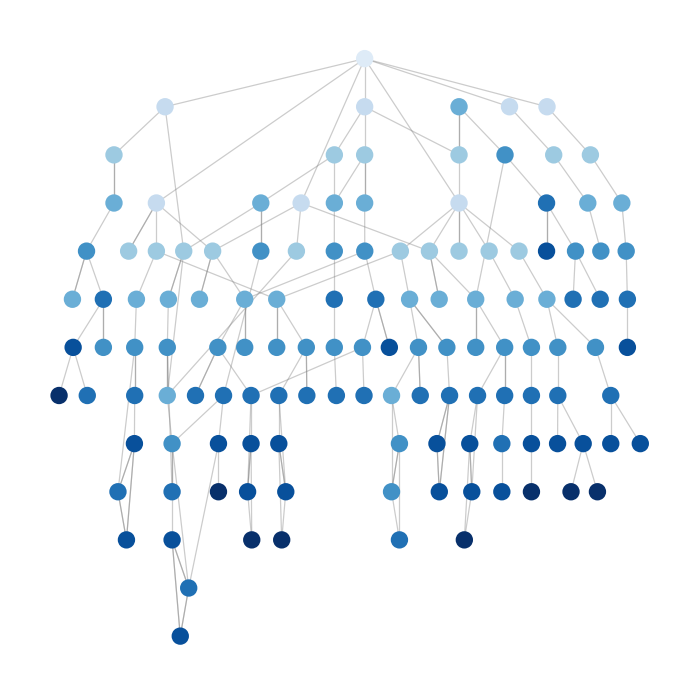

In [263]:

sub = state_network.create_subgraph_with_beam_array([5,3,2,2,2,2,2])
path = state_network.get_path_from_init_to_node(hit_node)
for idx,n in enumerate(path):
    if n not in sub.nodes:
        sub.add_node(n)
    if idx < len(path)-1:
        sub.add_edge(n, path[idx+1])
    else:
        continue


path = state_network.get_path_from_init_to_node(side_node)
for idx,n in enumerate(path):
    if n not in sub.nodes:
        sub.add_node(n)
    if idx < len(path)-1:
        sub.add_edge(n, path[idx+1])
    else:
        continue

path = state_network.get_path_from_init_to_node(side_node2)
for idx,n in enumerate(path):
    if n not in sub.nodes:
        sub.add_node(n)
    if idx < len(path)-1:
        sub.add_edge(n, path[idx+1])
    else:
        continue



for snp in side_node2_plus:
    path = state_network.get_path_from_init_to_node(snp)
    # print(path)
    for idx,n in enumerate(path):
        if n not in sub.nodes:
            sub.add_node(n)
        if idx < len(path)-1:
            sub.add_edge(n, path[idx+1])
        else:
            continue


print(sub)
state_network.draw_hypergraph_single_color(
    sub=sub, name="figure1_intro", text=False, fig_size=(2.75, 2.75), node_size=10,
    # highlight=["COP(=O)(OC)C(Nc1ccccc1)(C(=O)O)c1ccccc1.O"],
    # highlight=[hit_node, side_node, side_node2]
)

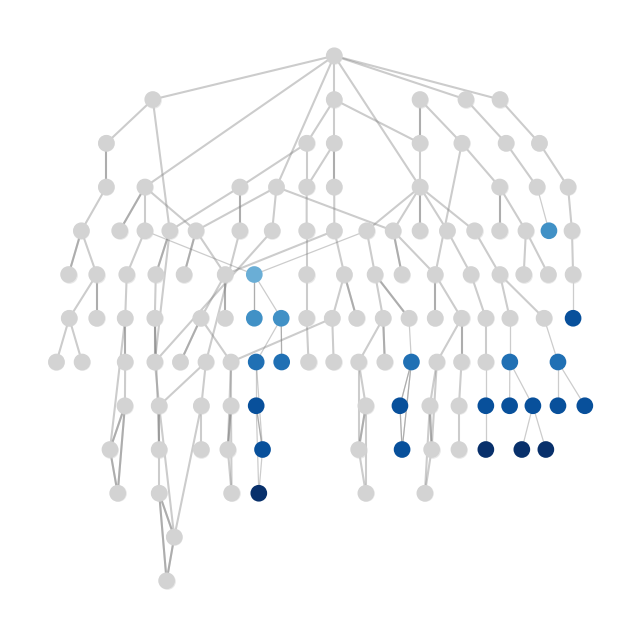

In [283]:
highlights1=[]
for k in sub.nodes:
    # count number of +
    num_outs = k.count(".")
    if num_outs > 1:
        highlights1.append(k)
        continue
    if "O" in k.split("."):
        continue
    if num_outs == 1:
        highlights1.append(k)



state_network.draw_hypergraph_single_color(
    sub=sub, name="figure1_intro_f1", text=False, fig_size=(2.5, 2.5), node_size=9,
    # highlight=["COP(=O)(OC)C(Nc1ccccc1)(C(=O)O)c1ccccc1.O"],
    highlight=highlights1
)



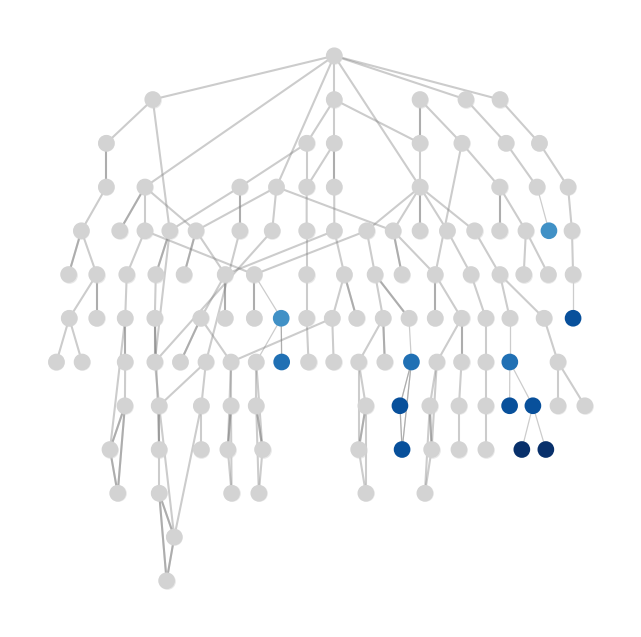

In [285]:
highlights2=[*highlights1]
for k in sub.nodes:
    # count number of +
    num_p = k.count("+")
    num_n = k.count("-")
    if num_p > 1 or num_n > 1:
        highlights2.append(k)



state_network.draw_hypergraph_single_color(
    sub=sub, name="figure1_intro_f2", text=False, fig_size=(2.5, 2.5), node_size=9,
    # highlight=["COP(=O)(OC)C(Nc1ccccc1)(C(=O)O)c1ccccc1.O"],
    highlight=highlights2
)



ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

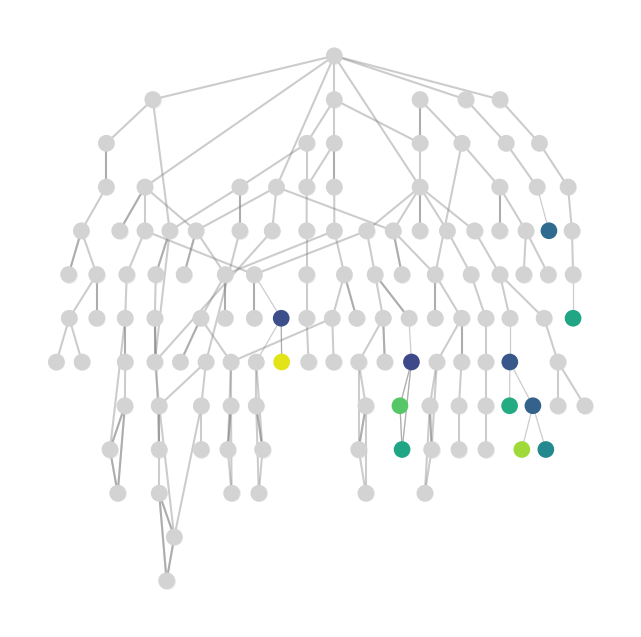

In [292]:
import matplotlib

print(matplotlib.colormaps)



highlights2=[*highlights1]
for k in sub.nodes:
    # count number of +
    num_p = k.count("+")
    num_n = k.count("-")
    if num_p > 1 or num_n > 1:
        highlights2.append(k)



state_network.draw_hypergraph_single_color(
    sub=sub, name="figure1_intro_f3", text=False, fig_size=(2.5, 2.5), node_size=9,
    # highlight=["COP(=O)(OC)C(Nc1ccccc1)(C(=O)O)c1ccccc1.O"],
    highlight=highlights2,
    cm="viridis",
    attr="random"
)

